<a href="https://colab.research.google.com/github/noshiniy/Deep-Learning-Mini-Project-01/blob/main/Sinhala_Character_Recognition_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [33]:
import numpy as np
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

MOUNT THE GOOGLE DRIVE

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CHANGE THE CURRENT WORKING DIRECTORY

In [35]:
os.chdir("/content/drive/My Drive/Deep Learning/Deep Learning Mini Project 01/n vs y/")
os.getcwd()

'/content/drive/My Drive/Deep Learning/Deep Learning Mini Project 01/n vs y'

LOAD DATASETS

Shape:  (1000, 1000, 3) 



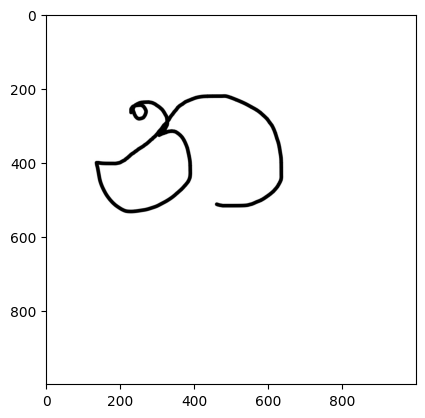

In [36]:
#Specify the path to the image and load the image using load_img from Keras
imgN = image.load_img("train/n/n1.jpg")

#Display the image using matplotlib
plt.imshow(imgN)

#Read the image using OpenCV (cv2) and retrieve its shape
print("Shape: ", cv2.imread("train/n/n1.jpg").shape, "\n")

Shape:  (1000, 1000, 3) 



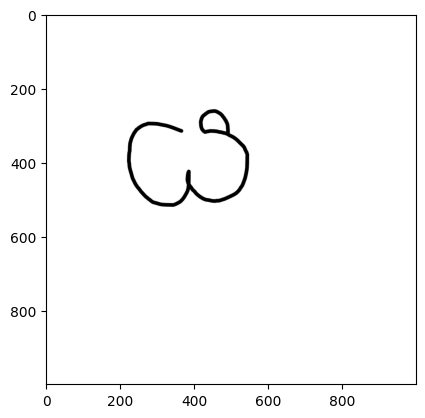

In [37]:
#specify the path to the image and load the image using load_img from Keras
imgY = image.load_img("train/y/y1.jpg")

#display the image using matplotlib
plt.imshow(imgY)

#read the image using OpenCV (cv2) and retrieve its shape
print("Shape: ", cv2.imread("train/y/y1.jpg").shape, "\n")

In [38]:
#create an ImageDataGenerator for training data with pixel value rescaling
train = ImageDataGenerator(rescale = 1/255)

#create an ImageDataGenerator for validation data with pixel value rescaling
validation = ImageDataGenerator(rescale = 1/255)

CREATE "TRAIN" & "VALIDATE" DATASETS BY ImageDataGenerator

In [39]:
#create a 'train' dataset generator using the training ImageDataGenerator
train_dataset = train.flow_from_directory('train/', target_size = (100,100), batch_size = 32, class_mode = 'binary')

Found 80 images belonging to 2 classes.


In [40]:
#create a 'validate' dataset generator using the validation ImageDataGenerator
validation_dataset = validation.flow_from_directory('validate/', target_size = (100,100), batch_size = 32, class_mode = 'binary')

Found 80 images belonging to 2 classes.


In [41]:
#retrieve the mapping of class names to their indices in the training dataset
train_dataset.class_indices

{'n': 0, 'y': 1}

In [42]:
#retrieve the array of class indices for each sample in the training dataset
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

SPECIFY THE CNN ARCHITECTURE

In [43]:
#create a Sequential model
model = Sequential()

#convolutional layer with 16 filters, each of size (3, 3), and ReLU activation
model.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = (100,100,3)))
#maxPooling layer with pool size (2, 2)
model.add(MaxPool2D((2, 2)))

#convolutional layer with 32 filters, each of size (3, 3), and ReLU activation
model.add(Conv2D(32, (3, 3), activation = 'relu'))
#maxPooling layer with pool size (2, 2)
model.add(MaxPool2D(2, 2))

#convolutional layer with 64 filters, each of size (3, 3), and ReLU activation
model.add(Conv2D(64, (3, 3), activation = 'relu'))
#maxPooling layer with pool size (2, 2)
model.add(MaxPool2D(2, 2))

#flatten layer to convert 3D feature maps to 1D feature vectors
model.add(Flatten())
#dense (fully connected) layer with 512 units and ReLU activation
model.add(Dense(512, activation = 'relu'))
#output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation = 'sigmoid'))


# Compile the model with binary crossentropy loss, RMSprop optimizer, and accuracy metric
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

TRAIN THE MODEL

In [46]:
#train the model using the training dataset and validate on the validation dataset
model.fit(train_dataset, epochs = 10, validation_data = validation_dataset)

Epoch 1/10
3/3 [==============================] - 3s 999ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 2s 870ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 2s 1s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 2s 754ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 2s 589ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 2s 892ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 2s 1s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 9.1316e-04 - val_accuracy: 1.0000
Epoch 8/10
3/3 [======

In [47]:
#retrieve the mapping of class names to their indices in the validation dataset
validation_dataset.class_indices

{'n': 0, 'y': 1}

TEST THE SAMPLE DATA

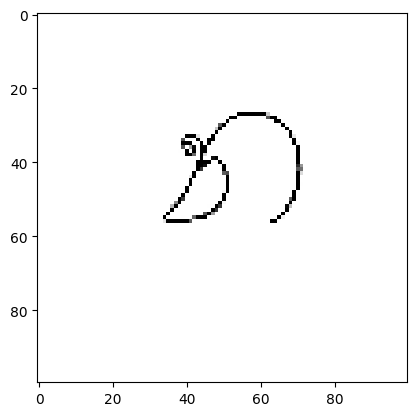

1/1 [==============================] - 0s 81ms/step
Predicted Sinhala Character: 'න' ---> 'න' අකුර




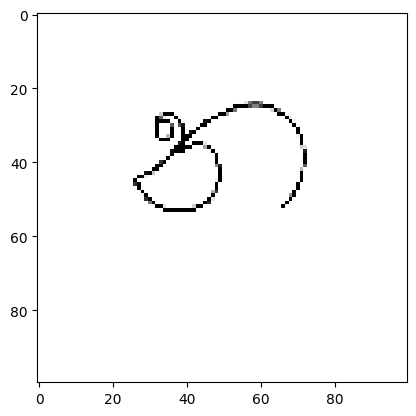

1/1 [==============================] - 0s 23ms/step
Predicted Sinhala Character: 'න' ---> 'න' අකුර




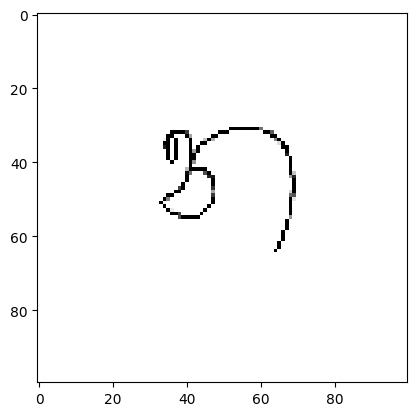

1/1 [==============================] - 0s 24ms/step
Predicted Sinhala Character: 'න' ---> 'න' අකුර




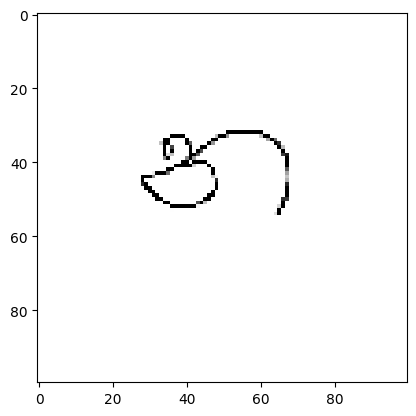

1/1 [==============================] - 0s 23ms/step
Predicted Sinhala Character: 'න' ---> 'න' අකුර




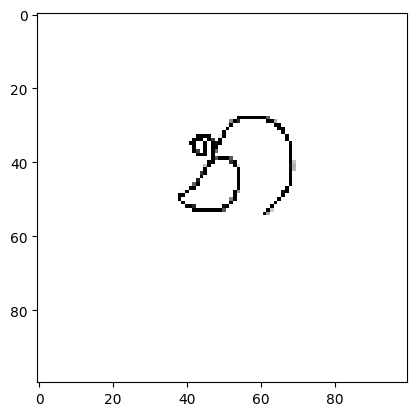

1/1 [==============================] - 0s 23ms/step
Predicted Sinhala Character: 'න' ---> 'න' අකුර




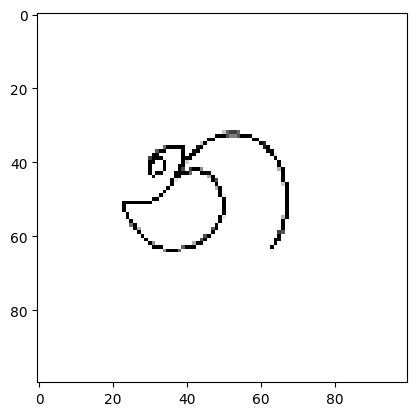

1/1 [==============================] - 0s 25ms/step
Predicted Sinhala Character: 'න' ---> 'න' අකුර




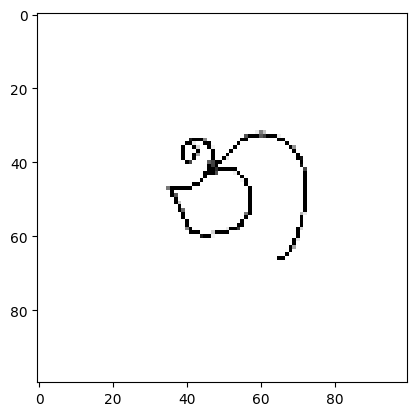

1/1 [==============================] - 0s 23ms/step
Predicted Sinhala Character: 'න' ---> 'න' අකුර




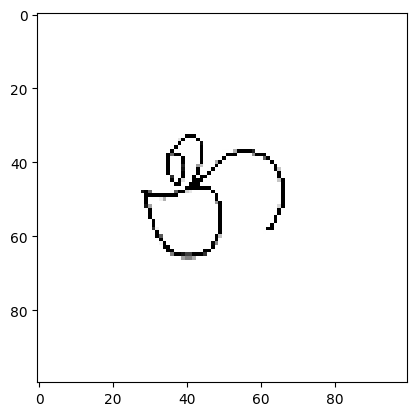

1/1 [==============================] - 0s 23ms/step
Predicted Sinhala Character: 'න' ---> 'න' අකුර




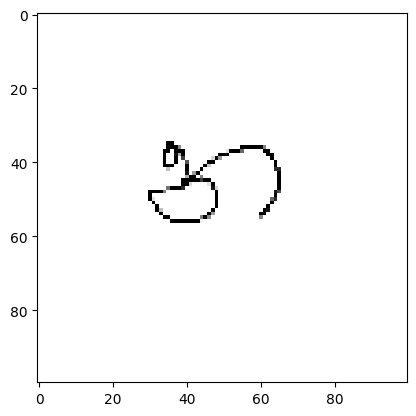

1/1 [==============================] - 0s 22ms/step
Predicted Sinhala Character: 'න' ---> 'න' අකුර




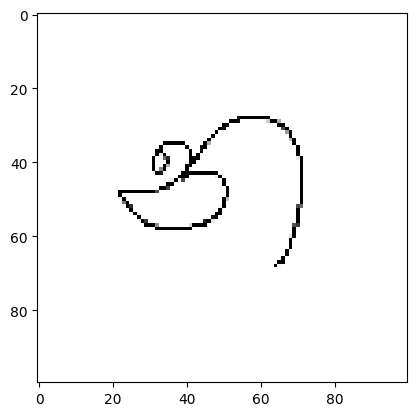

1/1 [==============================] - 0s 24ms/step
Predicted Sinhala Character: 'න' ---> 'න' අකුර




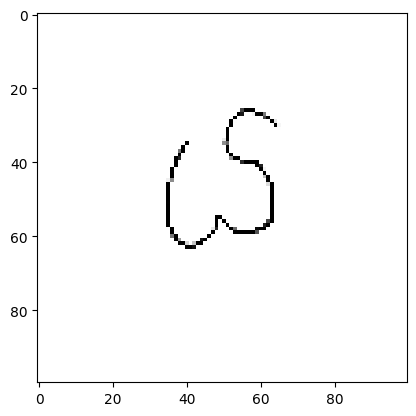

1/1 [==============================] - 0s 25ms/step
Predicted Sinhala Character: 'ය' ---> 'ය' අකුර




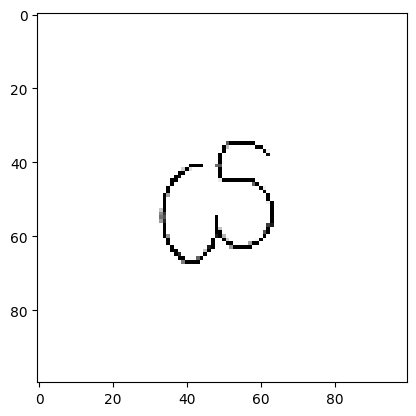

1/1 [==============================] - 0s 23ms/step
Predicted Sinhala Character: 'ය' ---> 'ය' අකුර




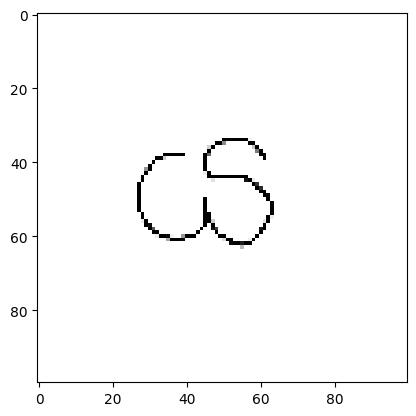

1/1 [==============================] - 0s 23ms/step
Predicted Sinhala Character: 'ය' ---> 'ය' අකුර




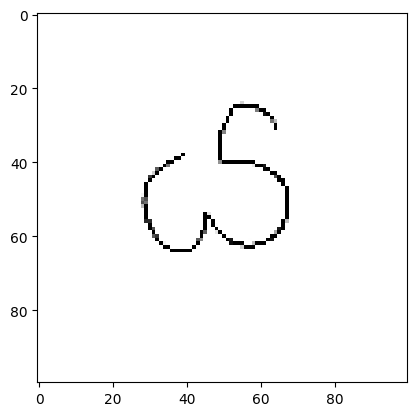

1/1 [==============================] - 0s 23ms/step
Predicted Sinhala Character: 'ය' ---> 'ය' අකුර




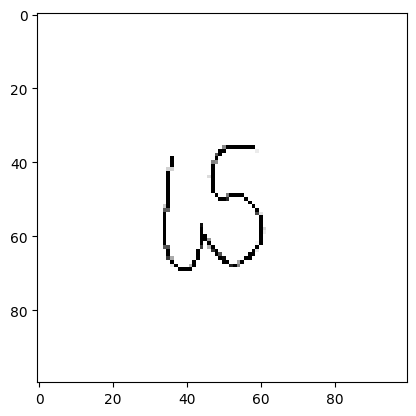

1/1 [==============================] - 0s 25ms/step
Predicted Sinhala Character: 'ය' ---> 'ය' අකුර




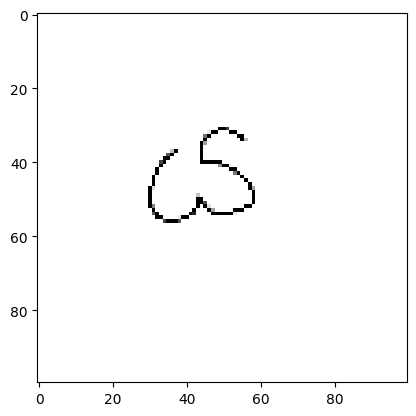

1/1 [==============================] - 0s 24ms/step
Predicted Sinhala Character: 'න' ---> 'න' අකුර




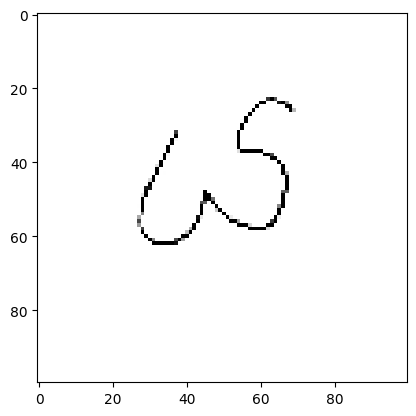

1/1 [==============================] - 0s 24ms/step
Predicted Sinhala Character: 'ය' ---> 'ය' අකුර




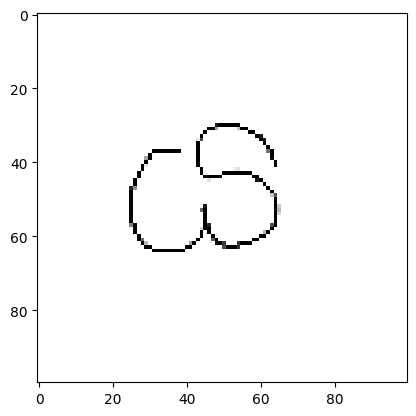

1/1 [==============================] - 0s 35ms/step
Predicted Sinhala Character: 'ය' ---> 'ය' අකුර




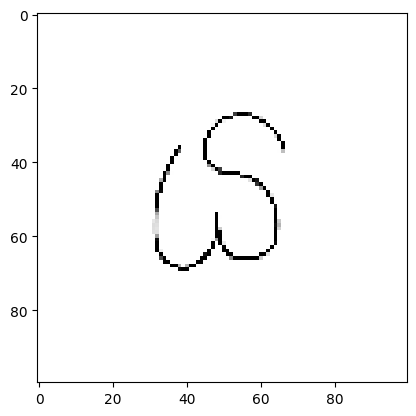

1/1 [==============================] - 0s 39ms/step
Predicted Sinhala Character: 'ය' ---> 'ය' අකුර




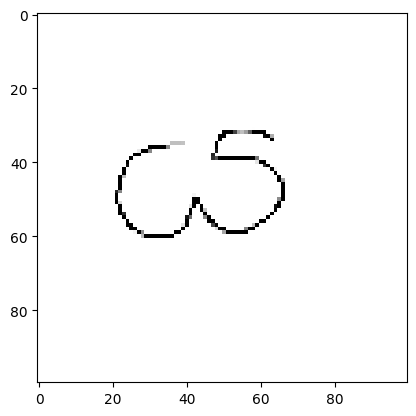

1/1 [==============================] - 0s 38ms/step
Predicted Sinhala Character: 'ය' ---> 'ය' අකුර




In [48]:
#directory path containing the testing images
dir_path = 'test/'

#loop over each file in the directory
for i in os.listdir(dir_path):
  imgN = image.load_img(dir_path + i, target_size = (100,100))    #load the image and resize it to the target size

  #display the image using matplotlib
  plt.imshow(imgN)
  plt.show()

#convert the image to a NumPy array and add an extra dimension
  X = image.img_to_array(imgN)
  X = np.expand_dims(X, axis = 0)

#stack the array vertically to create a batch of images
  images = np.vstack([X])

#make a prediction using the trained model
  val = model.predict(images)

#check the predicted value and print the corresponding class label
  if(val == 0):
    print("Predicted Sinhala Character: 'න' ---> 'න' අකුර\n\n")
  else:
    print("Predicted Sinhala Character: 'ය' ---> 'ය' අකුර\n\n")
